# Gradient Boosting and Random Forest examples

In [1]:
!pip install xgboost

In [2]:
# Data manipulation
import numpy as np
import pandas as pd

# Data Split
from sklearn.model_selection import train_test_split

# Model implementation
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBClassifier

# Model analysis metrics
# Classifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

# Regressor
from sklearn.metrics import mean_squared_error, r2_score

# Save models into a file
import pickle

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Magic command:
%matplotlib notebook

## Classifier (XGBoost)

Documentation: 
https://xgboost.readthedocs.io/en/latest/python/python_api.html

In [4]:
# Read the CSV file with pandas
heart_data = pd.read_csv("./framingham.csv")

In [9]:
#heart_data.dropna(inplace=True)
heart_data.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
# We will do exactly the same as we did with the logistic regression example
# Obtain data 
x = heart_data.drop("TenYearCHD", axis=1)
y = heart_data["TenYearCHD"]

# Split into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x,y, stratify=y, test_size=.4)

In [7]:
# Delcare an instance of the random forest classifier (read documentation and feel free
# to experiment with the parameters)
gradient_boosting_cls = XGBClassifier(
    n_estimators=400,
    learning_rate=0.001,
    max_depth=3,
    scale_pos_weight=5.5
)

gradient_boosting_cls.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5.5, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>


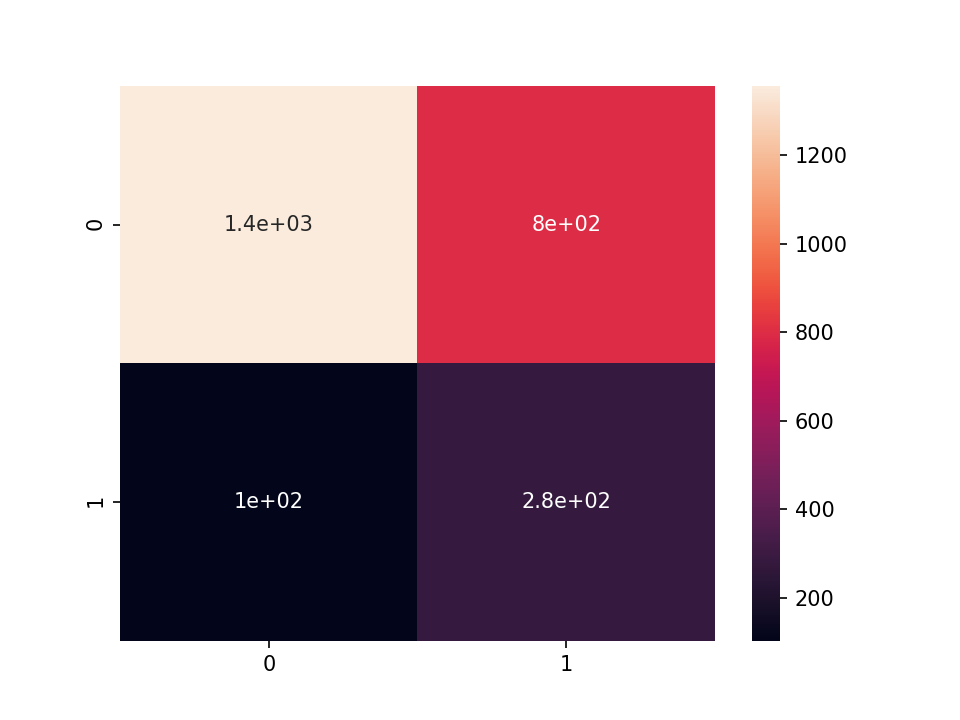

In [8]:
predictions = gradient_boosting_cls.predict(xtrain)
plt.figure()
confusion_mat = confusion_matrix(ytrain,predictions)
sns.heatmap(confusion_mat,annot=True)
plt.show()

In [10]:
# Generate a set of predictions using the trained model
predictions = gradient_boosting_cls.predict(xtest)
# We can obtain the accuracy
print(f"Accuracy on test set:{round(gradient_boosting_cls.score(xtest,ytest),2)}")

Accuracy on test set:0.61


<IPython.core.display.Javascript object>


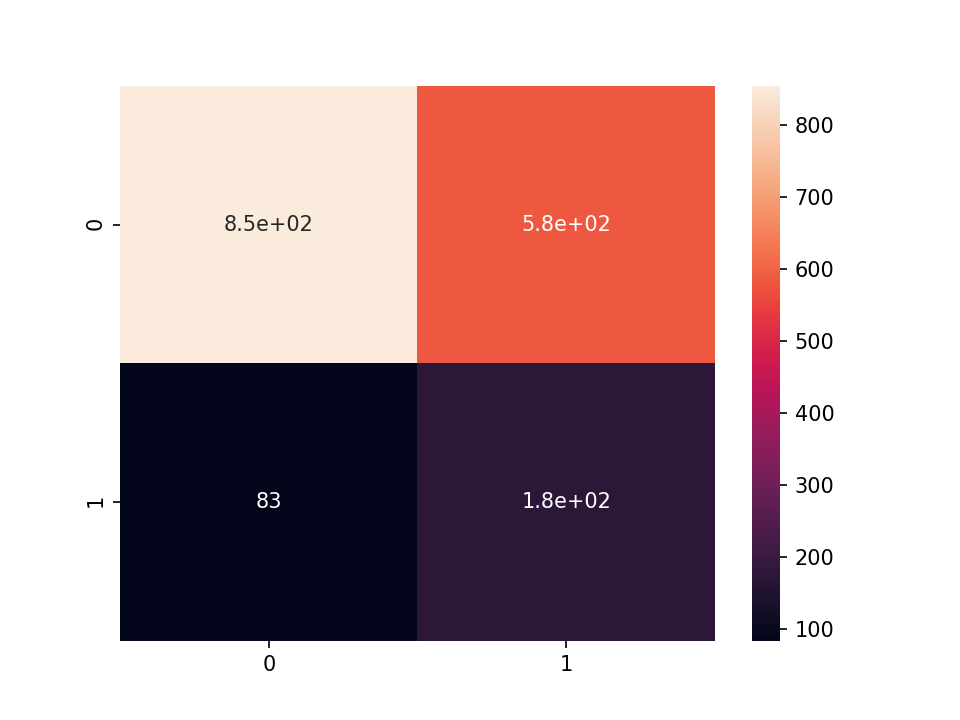

In [11]:
# As we did before, due to the nature of classification, we can use a confusion 
# Matrix to evaluate the performance
plt.figure()
confusion_mat = confusion_matrix(ytest,predictions)
sns.heatmap(confusion_mat,annot=True)
plt.show()

In [12]:
# It is possible to obtain the report of classification
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.91      0.59      0.72      1438
           1       0.23      0.68      0.34       258

    accuracy                           0.61      1696
   macro avg       0.57      0.64      0.53      1696
weighted avg       0.81      0.61      0.66      1696



<IPython.core.display.Javascript object>


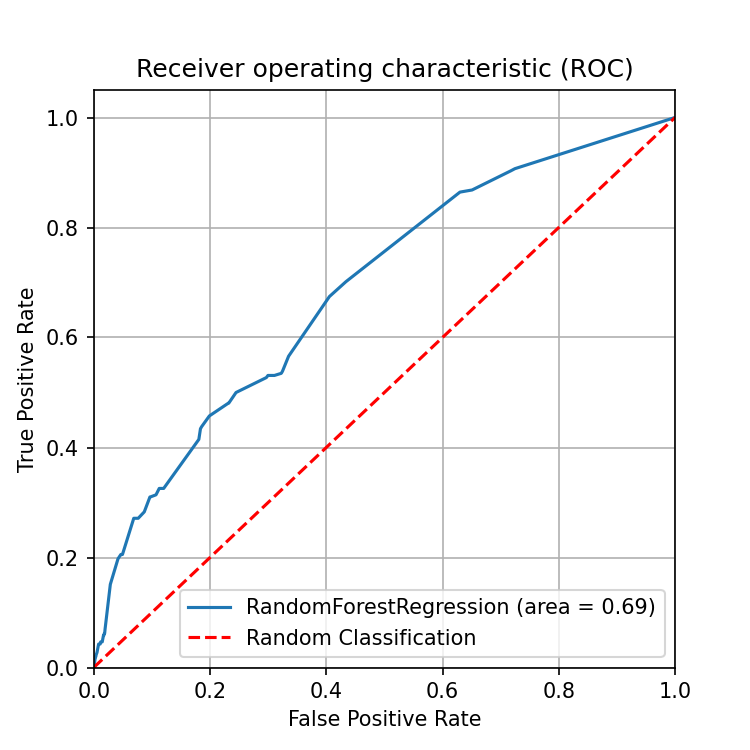

In [13]:
# It is now possible to obtain a roc and a auc score:
predict_proba = gradient_boosting_cls.predict_proba(xtest.fillna(-1000))[:,1]
roc_auc = roc_auc_score(ytest,predict_proba )
fpr, tpr, thresholds = roc_curve(ytest, predict_proba)

fig,ax = plt.subplots(figsize=(5,5))
#ax.set_aspect("equal")
ax.plot(fpr, tpr, label=f'RandomForestRegression (area = {round(roc_auc,2)})')
plt.plot([0, 1], [0, 1],'r--', label="Random Classification")
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Determine the feature importance
imp = pd.Series({x.columns[i]:gradient_boosting_cls.feature_importances_[i]
                 for i in range(len(x.columns))}).sort_values(ascending=False)

plt.figure()
plt.bar(imp.index, imp)
plt.title("Feature Importance")
plt.grid()
plt.xticks(rotation=90)
plt.show()

<IPython.core.display.Javascript object>


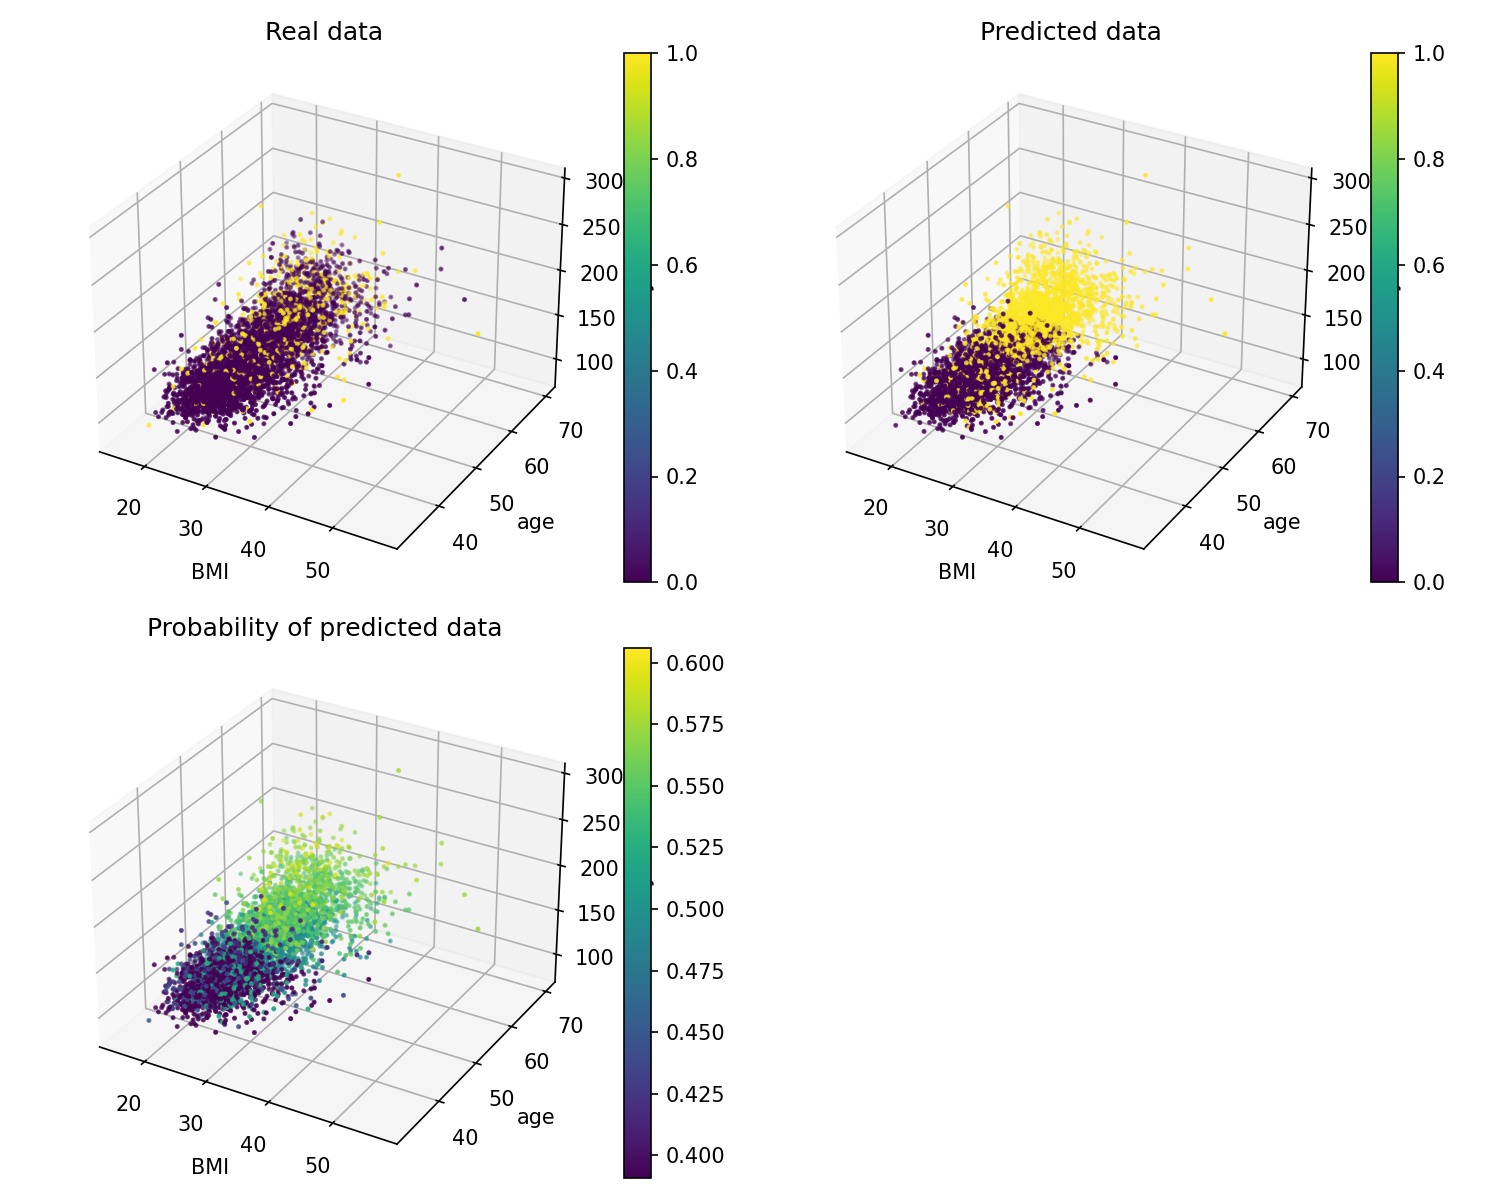

In [14]:
# 3D visualization
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(221,projection='3d')
p = ax.scatter(heart_data.BMI,heart_data.age, heart_data.sysBP, c=heart_data.TenYearCHD, s=2)
fig.colorbar(p)
ax.set_xlabel("BMI")
ax.set_ylabel("age")
ax.set_zlabel("sysBP")
plt.title("Real data")

ax = fig.add_subplot(222,projection='3d')
p = ax.scatter(heart_data.BMI,heart_data.age, heart_data.sysBP, c=gradient_boosting_cls.predict(x), s=2)
fig.colorbar(p)
ax.set_xlabel("BMI")
ax.set_ylabel("age")
ax.set_zlabel("sysBP")
plt.title("Predicted data")

ax = fig.add_subplot(223,projection='3d')
f = ax.scatter(heart_data.BMI,heart_data.age, heart_data.sysBP, c=gradient_boosting_cls.predict_proba(x)[:,1], s=2)
fig.colorbar(f)
ax.set_xlabel("BMI")
ax.set_ylabel("age")
ax.set_zlabel("sysBP")
plt.title("Probability of predicted data")


plt.show()
plt.tight_layout()

## Random Forest Regressor

Documentation:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [15]:
# Obtain data for regressor predictions

from sklearn.datasets import load_boston
bh_data = load_boston() # Same as the Linear regression example

In [16]:
# See the data, we will do the same as we did int the linear reg. example
df = pd.DataFrame(bh_data.data, columns=bh_data.feature_names)
df["MEDV"] = bh_data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
# Select the features for the model (all the features)
X = df.drop("MEDV",axis=1)
Y = df["MEDV"]

# Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=9)

In [18]:
# Create an instance of the Random Forest Regressor
random_forest_reg = RandomForestRegressor(n_estimators=100)

# Fit the data to the random forest regressor model (train the model)
random_forest_reg.fit(X_train,Y_train)

RandomForestRegressor()

In [19]:
# Predict the values
predictions = random_forest_reg.predict(X_test)

<IPython.core.display.Javascript object>


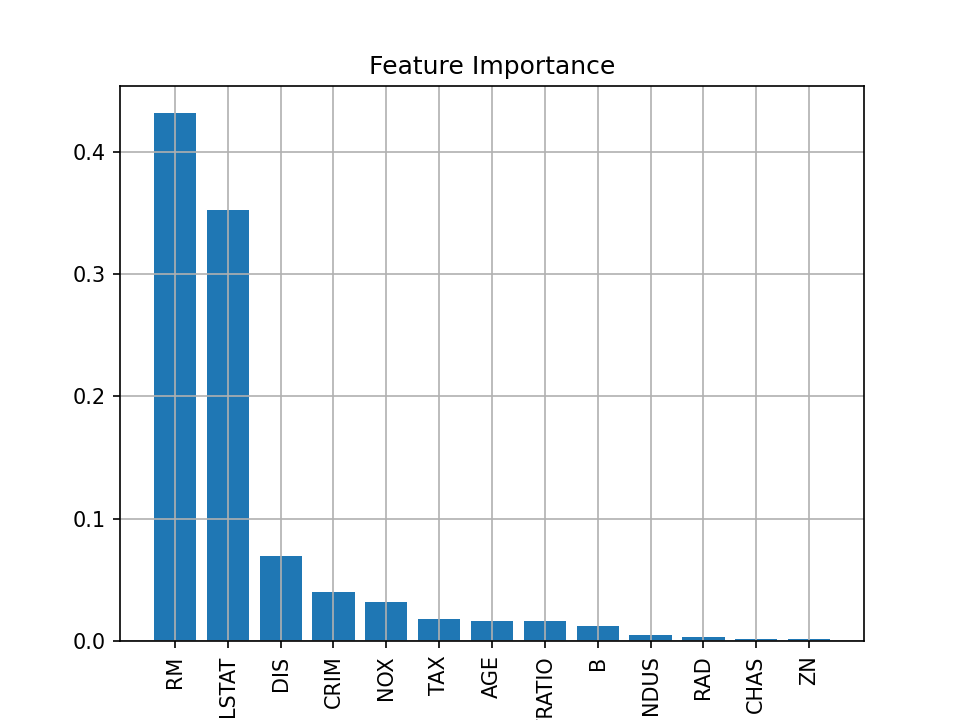

In [20]:
# Determine the importance
imp = pd.Series({X.columns[i]:random_forest_reg.feature_importances_[i] for i in range(len(X.columns))}).sort_values(ascending=False)

plt.figure()
plt.bar(imp.index, imp)
plt.title("Feature Importance")
plt.grid()
plt.xticks(rotation=90)
plt.show()

In [21]:
# To determine the performance of the model we can use some metrics

# Square root of the mean squared error:
test_rmse = np.sqrt(mean_squared_error(Y_test,predictions))

# Determination coeficient (R2)
test_r2sc = r2_score(Y_test,predictions)

# Remember the lower the value is the better it is
print("Square root of the mean squared error",test_rmse)

# The closer to one the better
print("Determination Coeficient",test_r2sc)

Square root of the mean squared error 3.3176246094185537
Determination Coeficient 0.8912247906785316


<IPython.core.display.Javascript object>


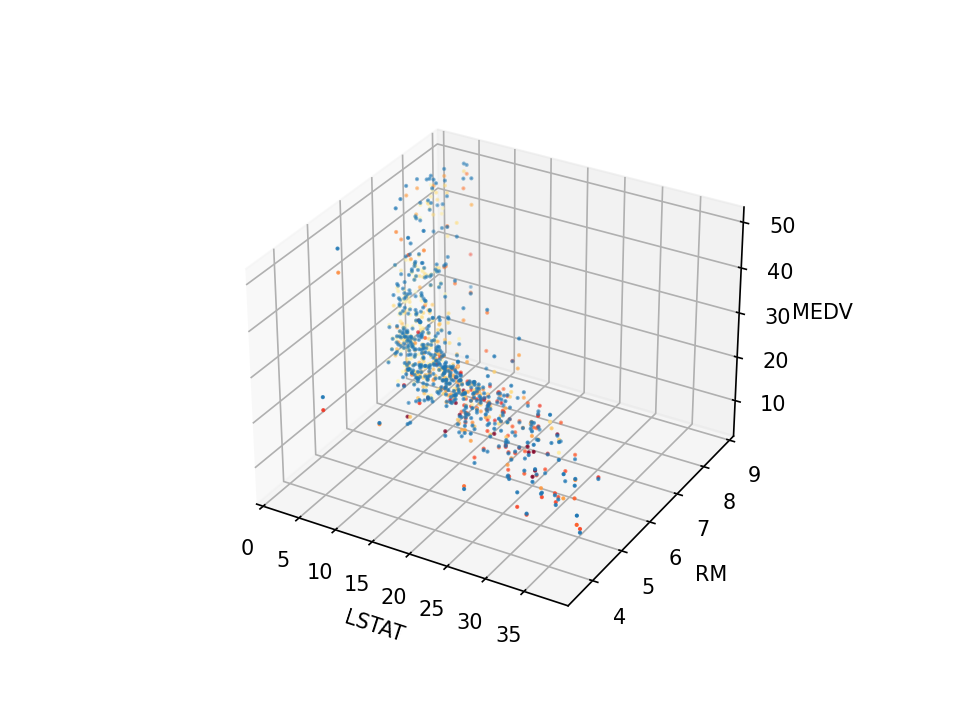

In [22]:
# 3D visualization
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X.LSTAT,X.RM, Y, s=1)
ax.scatter(X.LSTAT, X.RM, random_forest_reg.predict(X), s=1, c=X.NOX, cmap="YlOrRd")
ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")
plt.show()